**Import the `funded.csv` dataset and the required libraries and packages. After viewing a heading of the df, use the `value_counts` function to view the class distribution for `Outcome`.**

**What would you predict the Outcome to be for a new observation? What would be the accuracy of an *a priori* (naive) prediction approach? Show your formula.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

import seaborn as sns
import graphviz

In [2]:
df = pd.read_csv('funded.csv')
df.head()

,id,industry,months,pfunding,patents,smember,elites,outcome
0,1,healthcare,36,2900000,0,0,5,soldoff-low
1,2,healthcare,31,5500000,0,0,0,ipo
2,3,defense,29,500000,0,0,4,bankrupt
3,4,tech,29,2400000,1,0,5,soldoff-high
4,5,healthcare,31,5300000,0,1,5,ipo


In [3]:
df['outcome'].value_counts()

soldoff-high    384
bankrupt        337
soldoff-low     264
ipo             174
Name: outcome, dtype: int64

In [4]:
a = 384/len(df) 
print("apriori accuracy = ", a)

apriori accuracy =  0.33132010353753233


An naive model would predict soldoff-high with an accuracy of 33.13%.

**Assign your IVs to an x object and your DV to a y object, then split your data into a training and test set for x and y, using a 80-20 split. Remember to perform any preprocessing necessary on your IVs**


**Then train a `DecisionTreeClassifier` model from the training set**

In [5]:
x = df.drop(['id','outcome'], axis=1)
x = pd.get_dummies(data=x, drop_first=True)
y = df['outcome']
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.2, random_state = 100)

In [6]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=9, min_samples_leaf=5, min_impurity_decrease=0.004)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_impurity_decrease=0.004,
                       min_samples_leaf=5, random_state=100)

**Plot your decision tree using the `export_graphviz` function from the `tree` library.**

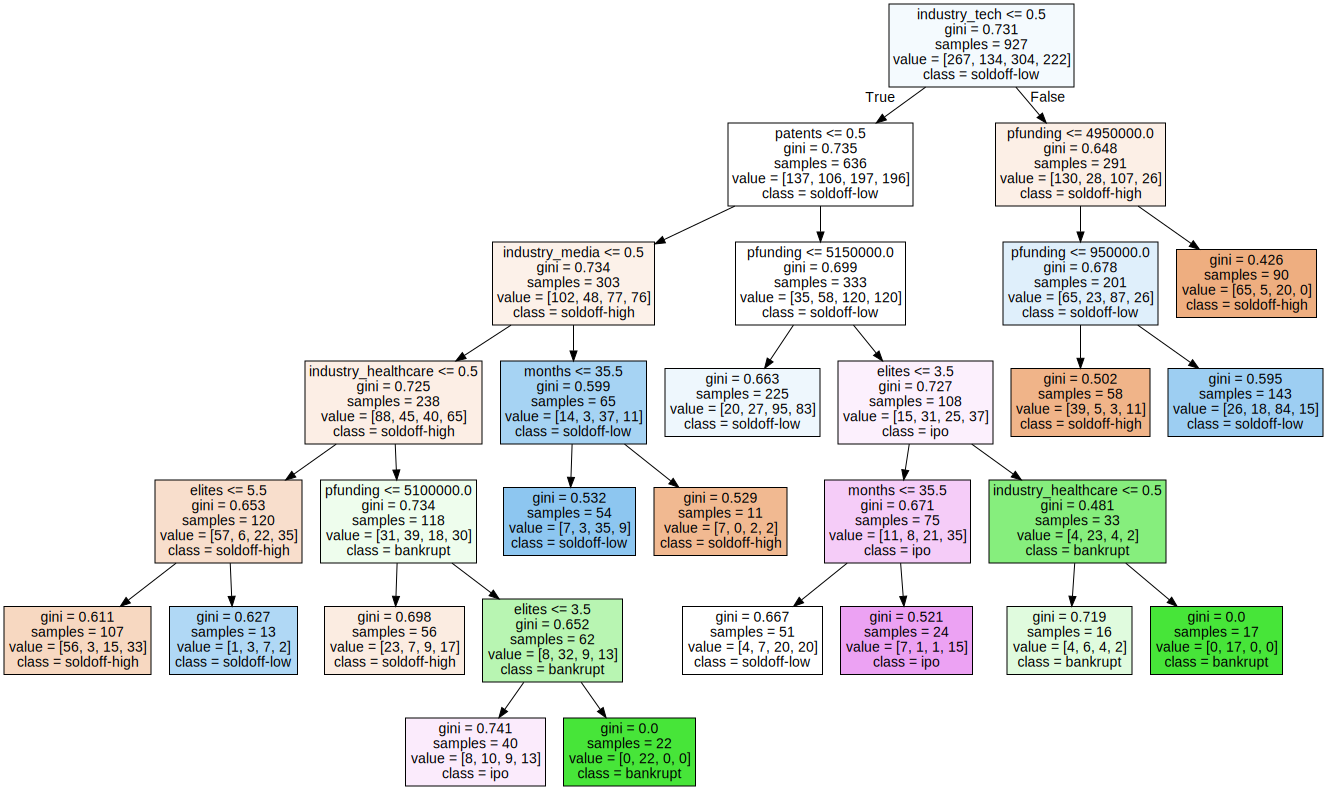

In [7]:
labels = y.value_counts()
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=x.columns,  
                                class_names=labels.index.values,
                                filled=True) #plot model

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Using your tree plot, what would be the predicted outcome for a defense company who has no patents and 4 elites?** 

**On how many observations would this prediction be based (i.e., how many observations are in the reminal node where the prediction was made)?**

Class = Soldoff-high, 107 observations

**Apply your model to the test set to evaluate its accuracy. Create a confusion matrix and then respond to the prompts below.**

In [8]:
predictions = model.predict(x_test)

In [9]:
df_pred = x_test
df_pred['predicted_class'] = predictions
df_pred['actual_class'] = y_test
df_pred

,months,pfunding,patents,smember,elites,industry_healthcare,industry_media,industry_tech,predicted_class,actual_class
662,17,6000000,1,0,5,0,0,0,ipo,ipo
492,28,7000000,1,0,4,1,0,0,ipo,ipo
137,28,5700000,1,0,2,0,0,1,bankrupt,soldoff-high
637,15,8500000,1,0,0,1,0,0,soldoff-high,bankrupt
639,36,3300000,1,0,0,0,0,0,soldoff-high,soldoff-high
...,...,...,...,...,...,...,...,...,...,...
511,41,500000,0,0,3,0,0,0,bankrupt,bankrupt
588,27,9300000,1,0,3,1,0,0,soldoff-high,ipo
189,27,3300000,1,0,5,1,0,0,soldoff-high,bankrupt
1042,42,2700000,1,0,7,0,0,0,soldoff-high,ipo


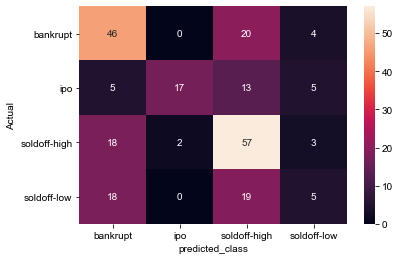

In [10]:
conf = pd.DataFrame(df_pred, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['predicted_class'])
sns.heatmap(confusion_matrix, annot=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

**For each of the four outcomes, provide the number of times the model predicted it, the number of times it predicted accurately, and the % accuracy (ratio of the # of predictions / # of accurate predictions).**

* Prediction: **Bankrupt**
  * Times Predicted: 87
  * Predicted Accurately: 46
  * % Accuracy: 52.87%

* Prediction: **Soldoff-Low**
  * Times Predicted: 17
  * Predicted Accurately: 5
  * % Accuracy: 29.41%

* Prediction: **Soldoff-High**
  * Times Predicted: 109
  * Predicted Accurately: 57
  * % Accuracy: 52.29%

* Prediction: **IPO**
  * Times Predicted: 19
  * Predicted Accurately: 17
  * % Accuracy: 89.47%


**Considering *all* predictions, in what percentage of observations did the model make an accurate prediction? Show your formula.**


In [11]:
acc = (46 + 17 + 57 + 5)/len(df_pred)
print("overall accuracy = ", acc)

overall accuracy =  0.5387931034482759


**Given this accuracy percentage, does it make more sense to use the *a priori* prediction approach or the decision tree model that was generated? Explain your answer.** 


It makes more sense to use the decision tree model, because it was significantly more accurate than the naive model.

**Next, compare this model's performance against three other possible decision tree models, each of which use different parameters. In a text cell placed before each new model, outline the `criterion` used (e.g., 'gini', 'entropy', or 'log-loss') , the `max_depth`, the `min_samples_leaf`, and the `min_impurity_decrease`.**

**The first model used the following paramters:**

* `criterion` = gini
* `max_depth` = 9
* `min_samples_leaf` = 5
* `min_impurity_decrease` = 0.004

**So change *at least* one of these parameters for each of your new models.**

**For each model generate a `classification_report` to show its overall accuracy on the test_set.**


### **Model 1:**

* `criterion` = gini
* `max_depth` = 9
* `min_samples_leaf` = 5
* `min_impurity_decrease` = 0.004

In [20]:
model1 = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=9, min_samples_leaf=5, min_impurity_decrease=0.004)

model1.fit(x_train, y_train)

predictions = model1.predict(x_test.drop(['predicted_class','actual_class'],axis=1))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.66      0.59        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.52      0.71      0.60        80
 soldoff-low       0.29      0.12      0.17        42

    accuracy                           0.54       232
   macro avg       0.56      0.48      0.48       232
weighted avg       0.55      0.54      0.51       232



### **Model 2:** 

* `criterion` = gini
* `max_depth` = 5
* `min_samples_leaf` = 8
* `min_impurity_decrease` = .004

In [21]:
model2 = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=5, min_samples_leaf=8, min_impurity_decrease=0.004)

model2.fit(x_train, y_train)

predictions = model2.predict(x_test.drop(['predicted_class','actual_class'],axis=1))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.66      0.59        70
         ipo       0.74      0.50      0.60        40
soldoff-high       0.52      0.71      0.60        80
 soldoff-low       0.11      0.02      0.04        42

    accuracy                           0.53       232
   macro avg       0.48      0.47      0.46       232
weighted avg       0.49      0.53      0.49       232



### **Model 3:**

* `criterion` = gini
* `max_depth` = 12
* `min_samples_leaf` = 5
* `min_impurity_decrease` = .004

In [22]:
model3 = DecisionTreeClassifier(criterion = "gini", random_state=100, 
                               max_depth=12, min_samples_leaf=5, min_impurity_decrease=0.004)

model3.fit(x_train, y_train)

predictions = model3.predict(x_test.drop(['predicted_class','actual_class'],axis=1))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.53      0.66      0.59        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.52      0.71      0.60        80
 soldoff-low       0.29      0.12      0.17        42

    accuracy                           0.54       232
   macro avg       0.56      0.48      0.48       232
weighted avg       0.55      0.54      0.51       232



### **Model 4:**

* `criterion` = entropy
* `max_depth` = 15
* `min_samples_leaf` = 4
* `min_impurity_decrease` = .01

In [28]:
model4 = DecisionTreeClassifier(criterion = "entropy", random_state=100, 
                               max_depth=15, min_samples_leaf=4, min_impurity_decrease=0.01)

model4.fit(x_train, y_train)

predictions = model4.predict(x_test.drop(['predicted_class','actual_class'],axis=1))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bankrupt       0.55      0.76      0.64        70
         ipo       0.89      0.42      0.58        40
soldoff-high       0.61      0.60      0.60        80
 soldoff-low       0.50      0.45      0.48        42

    accuracy                           0.59       232
   macro avg       0.64      0.56      0.57       232
weighted avg       0.62      0.59      0.59       232



**What parameters led to the best-performing (highest overall accuracy) model? What was the highest accuracy achieved?**

Model 4 had the highest accuracy at 56%. criterion = 'entropy', max_depth = 15, min_samples_leaf = 4, min_impurity_decrease = .01.

**Plot your best performing decision tree using the `export_graphviz` function from the `tree` library.**

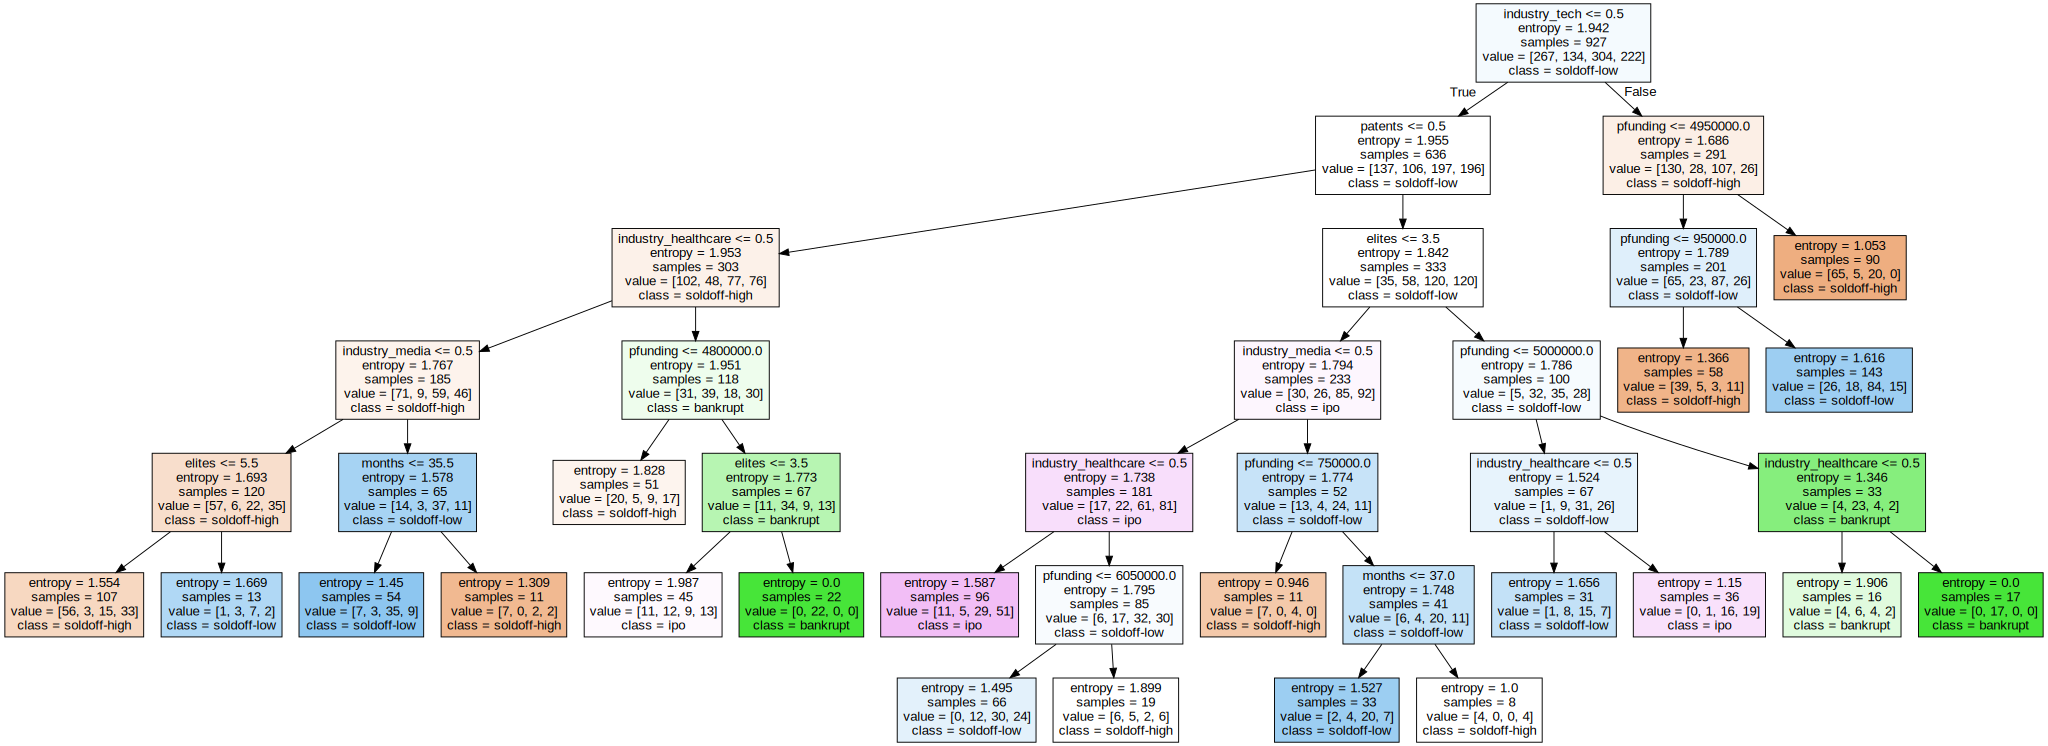

In [29]:
labels = y.value_counts()
dot_data = tree.export_graphviz(model4, out_file=None, 
                                feature_names=x.columns,  
                                class_names=labels.index.values,
                                filled=True) #plot model

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Arcturus has $11.5 million to invest and is considering from among 23 applicant firms. Create a Decision Trees model using your most accurate model (i.e., whichever model from Model 1-4 has the highest accuracy percentage), then apply the model as necessary to make predictions regarding the applicant firms.** 

**Data regarding these applicant firms can be found in the `fund-applicants.csv` data file. Note that there is no “outcome” column.**

**Begin by importing the `fund-applicant.csv` file, then apply your best model to this new data (after taking any required preprocessing steps).**


In [30]:
dfa = pd.read_csv('fund-applicants.csv')
dfa.head()

,id,industry,months,pfunding,patents,smember,elites,amount
0,1,tech,36,6800000,1,0,4,4000000
1,2,media,23,6300000,0,1,3,1700000
2,3,healthcare,27,6100000,0,1,0,3000000
3,4,defense,33,2800000,1,0,0,1000000
4,5,defense,39,5600000,1,0,2,5000000


In [34]:
x = dfa.drop(['id','amount'], axis=1)
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,months,pfunding,patents,smember,elites,industry_healthcare,industry_media,industry_tech
0,36,6800000,1,0,4,0,0,1
1,23,6300000,0,1,3,0,1,0
2,27,6100000,0,1,0,1,0,0
3,33,2800000,1,0,0,0,0,0
4,39,5600000,1,0,2,0,0,0


## A

**In addition to producing the predicted outcomes, also compute the predicted probabilities of the outcome using the `model.predict_proba()` function.**

**Add both the predicted outcome and the predicted probability as columns to the your dataframe.**

In [50]:
probabilities

array([[0.72222222, 0.05555556, 0.22222222, 0.        ],
       [0.12962963, 0.05555556, 0.64814815, 0.16666667],
       [0.24444444, 0.26666667, 0.2       , 0.28888889],
       [0.11458333, 0.05208333, 0.30208333, 0.53125   ],
       [0.11458333, 0.05208333, 0.30208333, 0.53125   ],
       [0.18181818, 0.12587413, 0.58741259, 0.1048951 ],
       [0.18181818, 0.12587413, 0.58741259, 0.1048951 ],
       [0.52336449, 0.02803738, 0.14018692, 0.30841121],
       [0.63636364, 0.        , 0.18181818, 0.18181818],
       [0.52336449, 0.02803738, 0.14018692, 0.30841121],
       [0.52336449, 0.02803738, 0.14018692, 0.30841121],
       [0.72222222, 0.05555556, 0.22222222, 0.        ],
       [0.52336449, 0.02803738, 0.14018692, 0.30841121],
       [0.        , 0.18181818, 0.45454545, 0.36363636],
       [0.18181818, 0.12587413, 0.58741259, 0.1048951 ],
       [0.67241379, 0.0862069 , 0.05172414, 0.18965517],
       [0.39215686, 0.09803922, 0.17647059, 0.33333333],
       [0.39215686, 0.09803922,

In [47]:
predictions = model4.predict(x)
proba = np.max(model.predict_proba(x), axis = 1)

dfa['predicted_class'] = predictions
dfa['predicted_prob'] = proba

dfa

,id,industry,months,pfunding,patents,smember,elites,amount,predicted_class,predicted_prob
0,1,tech,36,6800000,1,0,4,4000000,bankrupt,0.722222
1,2,media,23,6300000,0,1,3,1700000,soldoff-high,0.648148
2,3,healthcare,27,6100000,0,1,0,3000000,soldoff-low,0.288889
3,4,defense,33,2800000,1,0,0,1000000,soldoff-low,0.531250
4,5,defense,39,5600000,1,0,2,5000000,soldoff-low,0.531250
5,6,tech,18,3500000,0,0,8,2500000,soldoff-high,0.587413
6,7,tech,24,4800000,0,1,6,4000000,soldoff-high,0.587413
7,8,defense,30,3900000,0,0,1,1200000,bankrupt,0.523364
8,9,media,41,7800000,0,0,5,3500000,bankrupt,0.636364
9,10,defense,21,7900000,0,0,3,4000000,bankrupt,0.523364


**Describe what the predicted probabilities colum indicates (i.e., what do those values mean?). Are these probabilities based on the training or the test set?**

The predicted_prob column shows how certain the model is that the predicted_class will occur. These probabilities are based off the training set. The model was built from the training set.

**Using the info provided from the predicted probabilities and predicted outcomes, indicate the companies' project IDs that Arcturus should invest in if, for the sake of diversification, they wanted to invest their \$11.5 million in one project in each of the four industries: media, tech, healthcare, and defense.** 

**Give the IDs of the projects and explain why you’d recommend each project.**

* **Healthcare:** 
21. This one is predicted to ipo, with a predicted probability of 100%!
* **Defense:** 
4. It is one of 2 defense companies not predicted to go bankrupt. Because these are still predicted to sell off low, we should choose the one asking for less funding. Well, we should realistically decline the whole deal and move on without funding any defense company, but if we MUST choose one, this will likely lose us the least money.
* **Media:** 
22. This one has about the same chance of selling off high as id=2, but it has a higher chance of an ipo.
* **Tech:** 
6. This is equivalent to two other tech companies in terms of probability of success. This is the one that gets closest to using the full 11.5 million dollars, without exceeding it.